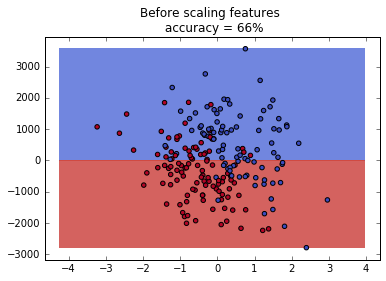

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


tr_data = pd.read_csv("train.csv", names=[1,2,3])
te_data = pd.read_csv("test.csv", names=[1,2,3])


tr_data = tr_data.as_matrix()

train_x = [[x[1], x[2]] for x in tr_data]
train_y = [x[0] for x in tr_data]


te_data = te_data.as_matrix()

test_x = [[x[1], x[2]] for x in te_data]
test_y = [x[0] for x in te_data]


plt.subplot(111)


clf_b = Perceptron(random_state=241)
clf_b.fit(train_x, train_y)

plot_x = [x[0] for x in test_x]
plot_y = [x[1] for x in test_x]

x_min, x_max = min(plot_x) - 1, max(plot_x) + 1
y_min, y_max = min(plot_y) - 1, max(plot_y) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 2))
z = clf_b.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(plot_x, plot_y, c=test_y, cmap=plt.cm.coolwarm)
plt.title('Before scaling features \n accuracy = 66%')

plt.show()

plt.subplot(111)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(test_x)


clf_a = Perceptron(random_state=241)
clf_a.fit(X_train_scaled, train_y)


plot_x = [x[0] for x in X_test_scaled]
plot_y = [x[1] for x in X_test_scaled]

x_min, x_max = min(plot_x) - 1, max(plot_x) + 1
y_min, y_max = min(plot_y) - 1, max(plot_y) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = clf_a.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(plot_x, plot_y, c=test_y, cmap=plt.cm.coolwarm)

plt.title('After scaling features \n accuracy = 85%')


predicted = clf_b.predict(test_x)
before_scale = accuracy_score(test_y, predicted) #0.654

predicted = clf_a.predict(X_test_scaled)
after_scale = accuracy_score(test_y, predicted) #0.854

plt.show()